In [2]:
# Импортируем библиотеки
from clustimage import Clustimage
import matplotlib.pyplot as plt
import os
import pandas as pd
import shutil
import warnings

warnings.filterwarnings('ignore')

In [3]:
home = r'D:\Рабочие файлы\Бидуп 1\4' # Устанавливаем рабочую директорию, в которой лежат звуковые файлы
os.chdir(home) 

img = r'D:\Рабочие файлы\Бидуп 1\4\img' # Директория, где лежат картинки

# Прописываем названия будущих каталогов и создаём папки в основной рабочей директории

'''Директория, куда будут сохранены звуковые файлы каталога 
(при наличии этих файлов в рабочей директории)'''

catalog_sound = home+'\\'+'catalog_sound' 
os.mkdir(catalog_sound)

catalog_img = home+'\\'+'catalog_img' # Директория, куда будут сохранены картинки каталога
os.mkdir(catalog_img)

os.chdir(img) # Меняем рабочую директорию на ту, где лежат искомые картинки

In [22]:
def repertoire(home, img):
    # Прописываем названия будущих каталогов и создаём папки в основной рабочей директории

    '''Директория, куда будут сохранены звуковые файлы каталога 
    (при наличии этих файлов в рабочей директории)'''

    catalog_sound = home+'\\'+'catalog_sound' 
    os.mkdir(catalog_sound)

    catalog_img = home+'\\'+'catalog_img' # Директория, куда будут сохранены картинки каталога
    os.mkdir(catalog_img)

    os.chdir(img) # Меняем рабочую директорию на ту, где лежат искомые картинки
    
    # Основной рабочий скрипт, классифицирующий картинки

    cl = Clustimage(method='pca',
                    embedding='tsne',
                    grayscale=False,
                    dim=(128,128),
                    params_pca={'n_components':0.95})

    # Load data
    X = cl.import_data(img)


    results = cl.fit_transform(X,
                               cluster='agglomerative',
                               evaluate='silhouette',
                               metric='euclidean',
                               linkage='ward',
                               min_clust=3,
                               max_clust=25,
                               cluster_space='high')

    # Создаём словарь с лейблами

    song_types = {}
    for i in range(len(results['pathnames'])):
        name = results['pathnames'][i].replace(img+'\\', '').replace('png', 'wav')
        song_types[name] = results['labels'][i]  
        
    # Создаём датафрейм с лейблами и сохраняем его в csv

    df = pd.DataFrame(list(song_types.items()), columns = ['Selection', 'Song type'])
    df.to_csv('song_types.csv')
    
    
    # Создаём лейблы для уникальных картинок и копируем их в каталоги с изображениями и звуками

    repertoire = {}
    for file in cl.unique()['pathnames']:
        name = file.replace(img+'\\', '').replace('png', 'wav')
        repertoire[name] = song_types[name]

    for key, value in repertoire.items():
        shutil.copyfile(f'{home}\\{key}', f"{catalog_sound}\\{value}.wav")

    images = {}
    for file in cl.unique()['pathnames']:
        name = file.replace(img+'\\', '')
        images[name] = song_types[name.replace('png', 'wav')]

    for key, value in images.items():
        shutil.copyfile(f'{img}\\{key}', f'{catalog_img}\\{value}.png')
        
    return df, cl

In [26]:
# Запускаем функцию

df, cl = repertoire(home, img)

[clustimage] >INFO> filepath is set to [C:\Users\Vaanry\AppData\Local\Temp\clustimage]
[clustimage] >INFO> filepath is set to [C:\Users\Vaanry\AppData\Local\Temp\clustimage]
[clustimage] >INFO> filepath is set to [C:\Users\Vaanry\AppData\Local\Temp\clustimage]
[clustimage] >INFO> Extracting images from: [D:\Рабочие файлы\Бидуп 1\4\img]
[clustimage] >INFO> [5] files are collected recursively from path: [D:\Рабочие файлы\Бидуп 1\4\img]
[clustimage] >INFO> [5] images are extracted.
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Reading and checking images.
[clustimage]: 100%|██████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 65.92it/s]
[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Skipping import because import is already performed outside the fit_transform()
[clustimage] >INFO> Extracting features using method: [pca]
[clustimage] >INFO> Extracted 

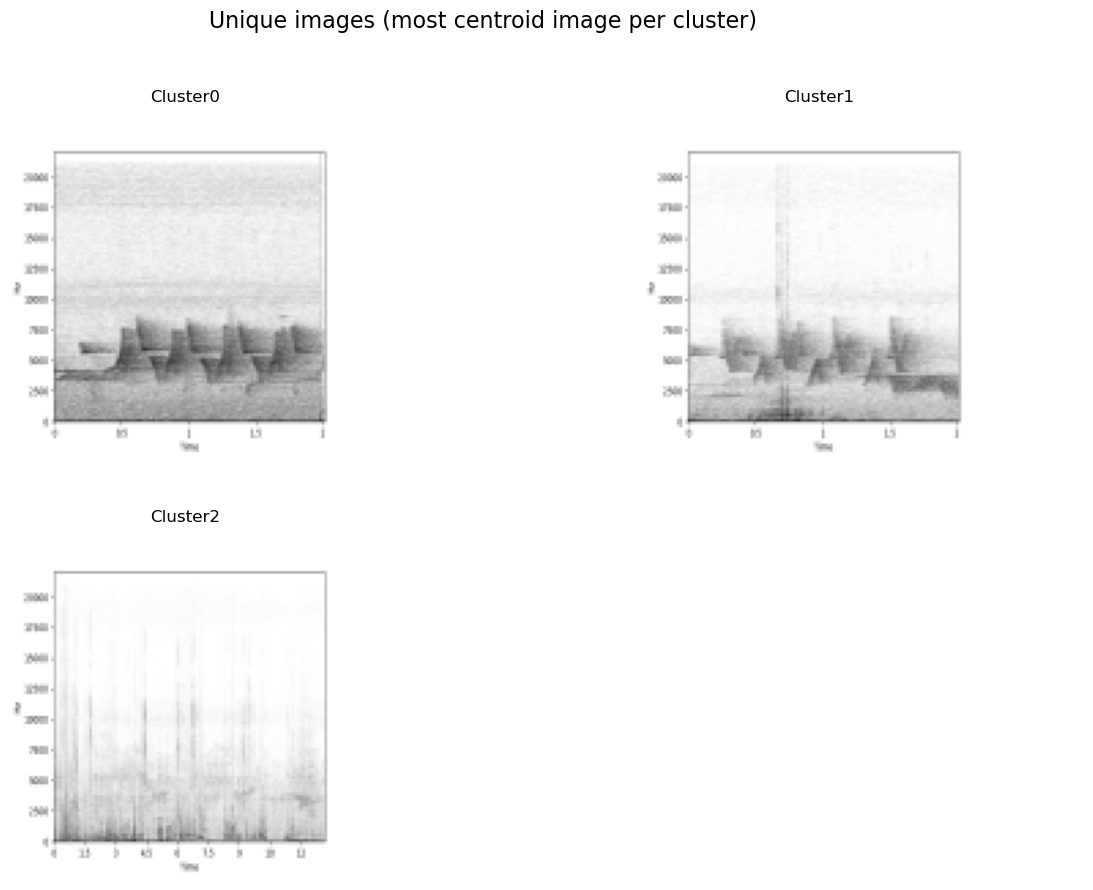

In [28]:
# Смотрим на наши кластеры

cl.plot_unique(img_mean=False)

In [29]:
# Смотрим на датафрейм с классифицированными файлами

df

Selection  Song type
0  sel.01.ch01.230818.150019.07..wav          1
1  sel.02.ch01.230818.150025.85..wav          0
2  sel.03.ch01.230818.150034.01..wav          0
3  sel.04.ch01.230818.150217.32..wav          1
4  sel.05.ch01.230818.150452.50..wav          2